In [1]:
import numpy as np
import pandas as pd
import re
from colorama import Fore, Back, Style

In [2]:
dataset = pd.read_excel('dataset/maya_dataset.xlsx', engine = 'openpyxl')

In [3]:
dataset = dataset.iloc[:, 0:2]

In [4]:
dataset.sample(5)

,posts,labels
806,হাই আমি প্রেমা আমার আট বছর হয়েছে বিয়ে হয়েছে...,2
761,আমি মেয়ে। বয়স ২০। হঠাৎ করে শরীর অনেক দু্র্বল ল...,1
4401,বাবা মা সেপারেট।৩ বছর বয়সে মাকে হারাই।আমি মেয়ে...,1
2556,হ্যালো এগেইন! নতুন ইউজার হিসেবে আমি ঠিক জানি ন...,2
3864,"আমি একটি মেয়েকে ছোট বেলা থেকেই ভালবাসতাম, একটা...",1


### Removing Emojis

In [5]:
df_1 = dataset.copy()

In [6]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F97A"
        u"\U00002639"
        u"\U00002764"
        u"\U0001F642"
        u"\U0001F600-\U000E007F"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)
for i in range(df_1.shape[0]):
    df_1.iloc[i,0] = deEmojify(df_1.iloc[i,0])

### <span style="color:darksalmon">Removing nan Fields</span>

In [7]:
df_1.isnull().sum(axis = 0)

posts     0
labels    0
dtype: int64

### <span style="color:aqua">Removing Punctuations</span>

In [8]:
df_2 = df_1.copy()

In [9]:
def depunctuate(text):
    regrex_pattern = re.compile(pattern = "["u"\/"u"\\"u"\^"u"\!"u"\@"u"\+"u"\*"u"\="u"\%"u"\&"u"\:"u"\;"u"\_"u"\."u"\,"u"\("u"\)"u"\?"u"\।"u"\|"u"'"u"\-"u"\""u"]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_2.shape[0]):
    df_2.iloc[i,0] = depunctuate(df_2.iloc[i,0])

In [10]:
df_2.sample(5)

,posts,labels
573,আমার কোনো ভালোবাসার মানুষ নেই আমার প্রতি মূহুর...,1
451,আপনাকে অনেক ধন্যবাদ আমার প্রশ্নের উত্তর দেওয়ার...,2
3133,কিচ্ছু কিচ্ছু করতে ভাল লাগে না কিন্তু সব কিছু ...,1
1601,আমার পরিচয় কি গোপন থাকছে আমি একজন সাইক্রিস্টে...,3
3348,আমি না অনেক ডিপ্রেশনে ভুগি বের হওয়ার উপায় কি,2


### <span style="color:red">Removing Numbers</span>

In [11]:
df_3 = df_2.copy()

In [12]:
def denumerize(text):
    regrex_pattern = re.compile(pattern = "[0-9০১২৩৪৫৬৭৮৯]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_3.shape[0]):
    df_3.iloc[i,0] = denumerize(df_3.iloc[i,0])

In [13]:
df_3.sample(5)

,posts,labels
122,শেয়ার করেছি কিন্তু তারা কোন গুরুত্বই দেননি হ...,1
4241,আমার বয়েস আমার তেমন কনো যৌন উতেজনা হয় না আগ...,2
4535,আমি বিয়ে করেছি পাঁচ বছর হয়েছে বর্তমানে আমার ...,2
1578,ডিপ্রেশনে আছি এই অবস্থা থেকে বের হতে চাই কি করব,2
267,আমি বছরের ছেলে কিন্তু আমার মনে হয় আমি যদি মে...,1


### <span style="color:hotpink">Discarding all Posts Beyond the Range of Acceptable Length </span>

In [14]:
df_4 = df_3.copy()

In [15]:
def remove_empty_string_literals(string_list):
    while("" in string_list) :
        string_list.remove("")
    return string_list

In [16]:
df_4['length'] = [len(remove_empty_string_literals(post.split(' '))) for post in df_4.iloc[:, 0]] 

In [17]:
df_4.sample(5)

,posts,labels,length
444,আমার বয়স আগের প্রশ্ন তে বলে ছি আমার সমস্যায়...,1,35
3451,আমার টিউব গুলো ব্লক এটা আমি মানতে পারছিনা তাই...,2,17
4572,নিয়মিত ঔষধ খেলে সাইকোথেরাপি নিলে ওসিডি নামক মা...,3,13
267,আমি বছরের ছেলে কিন্তু আমার মনে হয় আমি যদি মে...,1,21
3507,আপু আমি একজন ছেলে আমার বয়স বিশ বছর আমি একজ...,2,88


In [18]:
# Defining an acceptable range for the length of posts -> inclusive
LOWER_BOUND = 5
UPPER_BOUND = 300
df_5 = df_4[(df_4['length'] >= LOWER_BOUND) == True]
df_5 = df_5[(df_5['length'] <= UPPER_BOUND) == True]
print(df_5.shape)

(4605, 3)


In [19]:
df_5.sample(5)

,posts,labels,length
1971,আমার বয়স এ আমি মাধ্যমিক পরীক্ষা দেই বি...,4,148
515,ভালো লাগছে না আমার কথা শেয়ার করার মতও কেউ নে...,1,22
3826,অামি একটা রিলেশনে ছিলাম বছর সে পরে অন্য একজন...,3,34
3812,আমি বেশ কিছু দিন যাবত ড্রিপ্রেশনে আছি কোন কিছ...,2,53
4254,আপা আমি যাকে অনেক বেশি ভালবাসি সে অন্য মেয়েকে...,1,33


### <span style="color:orange">Tokenizing Dataset</span>

In [20]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_5.iloc[:, 0:1].values, df_5.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

### <span style="color:deeppink">Visualizing Word Frequency Distribution</span>

In [21]:
words = [word for words in x for word in words]

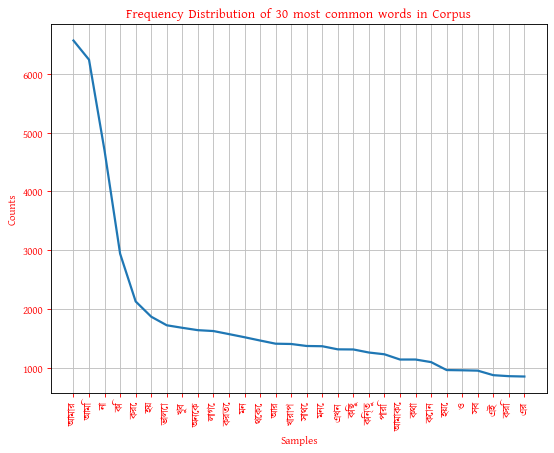

In [22]:
from nltk.probability import FreqDist
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
from matplotlib.pyplot import figure

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(8, 6), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Visualizing Post Length Frequency Distribution</span>

In [23]:
lens = [len(posts) for posts in x]
lens = pd.Series(lens, name = "post length")

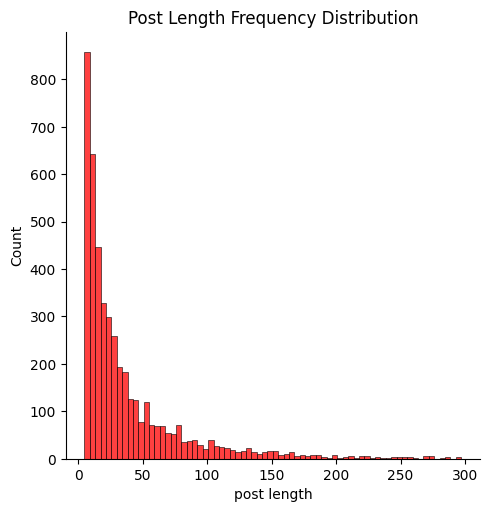

In [24]:
import seaborn as sns
sns.displot(lens, color = 'r').set(title = 'Post Length Frequency Distribution')
import matplotlib.pyplot as plt
plt.show()

### <span style="color:deepskyblue">Visualizing Label Counts</span>

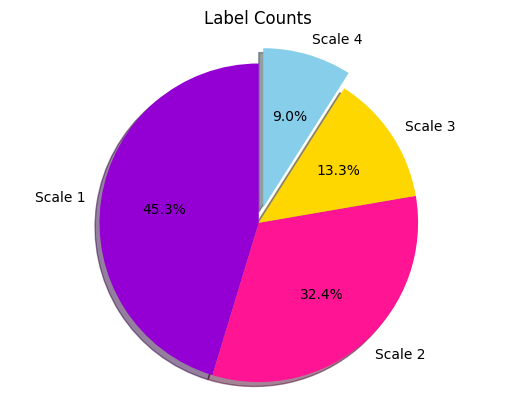

In [25]:
counts = df_3['labels'].value_counts().to_dict()
import matplotlib.pyplot as plt
labels = 'Scale 1', 'Scale 2', 'Scale 3', 'Scale 4'
sizes = [counts[1], counts[2], counts[3], counts[4]]
colors = ['#9400D3','#FF1493','#FFD700','#87CEEB']
explode = (0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, 
        autopct = '%1.1f%%', 
        shadow = True, 
        startangle = 90,
        colors = colors)
ax1.axis('equal')
plt.title('Label Counts')
plt.show()

### <span style="color:crimson">Spell Correction using FastText</span>

<font>Source:
    https://medium.com/analytics-vidhya/bengali-word-spelling-correction-using-pre-trained-word2vec-1f9938f48b09
</font>

- letters = The Bengali script has a total of 9 vowels. Each of which is called a ‘স্বরবর্ণ’. Also, have 35 consonants that are known as ‘ব্যঞ্জনবর্ণ ‘.

- splits = It is working as a list which has both forward and reverses orders of the word sequence.

- deletes = Also, a list which checks the left and right of a word in splits list and deletes the incorrect syntax.

- transposes = It is used to change word places with each other words using the splits list.

- replaces = Is a list it put words back in a previous place or position.

- inserts = It helps to place and fit the correct words into the replacing with the incorrect word, especially with care.

In [26]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('models/cc.bn.300.vec')

In [27]:
words = model.index_to_key
word_rank = {}
for index, word in enumerate(words):
    word_rank[word] = index

In [28]:
# This methods returns the value for the given key, if present in the dictionary using the get() method
def P(word): 
    return - word_rank.get(word, 0)

#  It returns the maximum candidates words with a key which is defined by P
def correction(word): 
    return max(candidates(word), key=P)

# The absolute candidate of the wrong word could found from known() methods is the actual work of this function.
def candidates(word): 
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# This method is used to find out the set of a word which is present in the dictionary
def known(words): 
    return set(w for w in words if w in word_rank)

# Many parameters such as deletes, transposes, replaces, inserts are used in this method.
# Those parameters return the correct word of an incorrect word in a sentence.
# A set() function is used to find out the unordered collection of words
def edits1(word):
    letters    = 'ঁংঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ঽািীুূৃৄেৈোৌ্ৎৗড়ঢ়য়'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)
    
#  This method is returend the word which is edited by in edits1() functions
def edits2(word): 
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [29]:
def spell_correction(sentence):
    corrected_sentence = []
    for word in sentence:
        corrected_sentence.append(correction(word))
    return re.sub(' +' ,' ', ' '.join(corrected_sentence))

In [30]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
x = df_5.iloc[:, 0:1].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])
for i in range(df_5.shape[0]):
    df_5.iloc[i, 0] = spell_correction(x[i])

In [31]:
df_5.sample(5)

,posts,labels,length
3080,পড়াশোনা ঠিক মতো হচ্ছে না কী করলে মন ভালো থাকব...,1,11
4181,আমি বলেছিলাম আমার একটা মেয়ের বছর প্রেম ছিলো এখ...,1,20
3659,আমি একজনকে খুব ভালোবাসি ওর সাথে আমার সম্পর্ক ছ...,1,170
1169,আমার পড়াশুনা শেষ এখন চাকরীর প্লে করতেছি কিন্ত...,2,21
2568,আমি সাইক্রিয়াটিস্ট দেখাইছি একটা সময় ছিল আমি এক...,3,71


### <span style="color:coral">Removing Stopwords</span>

In [32]:
from bnlp.corpus.util import remove_stopwords

In [33]:
file = open('stopwords/stopwords-bn.txt', encoding = 'utf-8')
stopwords = []
for line in file:
    stopwords.append(line.strip())
file.close()
stopwords = list(filter(None, stopwords))

In [34]:
df_6 = df_5.iloc[:, 0:2].copy()

In [35]:
 for i in range(df_6.shape[0]):
     df_6.iloc[i, 0] = ' '.join(remove_stopwords(df_6.iloc[i, 0], stopwords))

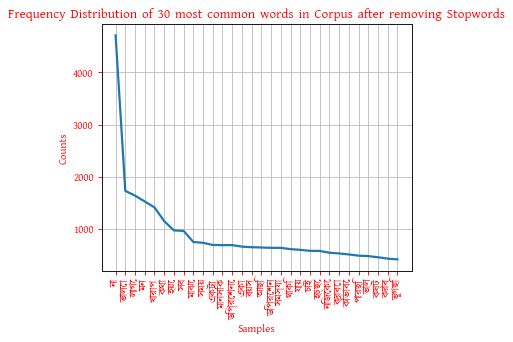

In [36]:
# Revisualizing Word Frequency Distribution after removing Stopwords
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_6.iloc[:, 0:1].values, df_6.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

words = [word for words in x for word in words]

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(5, 4), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus after removing Stopwords")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Creating Sparse Matrix</span>

In [37]:
corpus = df_6.iloc[:, 0].values
y = df_6.iloc[:, 1].values

In [38]:
df_6.sample(5)

,posts,labels
2311,বছরের একজন প্রচন্ডরকম ডিপ্রেশন ভুগছি,2
2702,একটু ভালো ডিপ্রেশনের শেষ মূহুর্ত টা পার করছি,2
3296,ডিপ্রেশন কাটাতে ঔষধ সেবন,3
322,উপসর্গের কথা উল্লেখ সব গুলোই বের পারবো জানাবেন,1
4075,ভালো লাগছে না করবো,1


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(corpus, y, test_size=0.2)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x_train = cv.fit_transform(x_train).toarray()
x_test = cv.transform(x_test)

### <span style="color:cyan">Creating TF-IDF Feature Vector</span>

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test=train_test_split(corpus, y, test_size=0.2)

In [41]:
tf_idf = TfidfVectorizer(encoding = 'utf-8', lowercase = False, norm = 'l2', sublinear_tf = True, min_df = 2, ngram_range = (1, 2))
x_tfidf_train = tf_idf.fit_transform(x_tfidf_train).toarray().tolist()
x_tfidf_test = tf_idf.transform(x_tfidf_test).toarray().tolist()

### <span style="color:purple">Classification using Naive Bayes</span>

In [42]:

from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_test, y_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_test, y_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_test, y_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.70      0.72       424
           2       0.68      0.70      0.69       291
           3       0.46      0.42      0.44       117
           4       0.53      0.64      0.58        89

    accuracy                           0.66       921
   macro avg       0.60      0.62      0.61       921
weighted avg       0.66      0.66      0.66       921

Confusion Matrix
[[297  59  35  33]
 [ 64 204  15   8]
 [ 28  31  49   9]
 [ 16   8   8  57]]

F1 score (macro): 0.605921392343189
F1 score (weighted): 0.6590397981603198
F1 score (micro): 0.6590662323561346
Accuracy: 0.6590662323561346


### <span style="color:red">Classification with SVM using GridSearchCV</span>

- <span style="color:white">Using Bag of Words</span>

In [44]:
corpus = df_6.iloc[:, 0].values
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(corpus).toarray()
y = df_6.iloc[:, 1].values
## Label encoding Y
#from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown = 'ignore')
# enc.fit(y)
# y = enc.transform(y).toarray()[:, :-1]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [0.8, 1, 1.2], 'kernel' : ['linear',]},
              {'C' : [32.75, 33, 33.25], 'kernel' : ['rbf',], 'gamma' : [0.008, 0.009, 0.01]},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['poly',], 'degree' : [2, 3, 4, 5, 6], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [1, 10, 50, 100]},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['sigmoid',], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [0.0, 0.5, 1, 10, 50, 100]},
             ]

In [47]:
grid_search = GridSearchCV(estimator = SVC(probability = False, verbose = True, decision_function_shape = 'ovo'), param_grid = parameters, scoring = 'f1_macro', cv = 5, n_jobs = 5, verbose = 5)
grid_search = grid_search.fit(x_train, y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LibSVM]

In [48]:
print(best_score)
print(best_parameters)

0.6725928360523898
{'C': 32.75, 'gamma': 0.009, 'kernel': 'rbf'}


In [49]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovo', C = 33, kernel = 'rbf', gamma = 0.01)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_test, y_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_test, y_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_test, y_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_test, y_pred))

[LibSVM]Classification Report
              precision    recall  f1-score   support

           1       0.81      0.89      0.85       419
           2       0.74      0.76      0.75       298
           3       0.62      0.38      0.47       126
           4       0.76      0.73      0.75        78

    accuracy                           0.77       921
   macro avg       0.73      0.69      0.70       921
weighted avg       0.76      0.77      0.76       921

Confusion Matrix
[[375  35   8   1]
 [ 49 226  15   8]
 [ 31  38  48   9]
 [  9   6   6  57]]

F1 score (macro): 0.7042417432253014
F1 score (weighted): 0.7567527901800822
F1 score (micro): 0.766558089033659
Accuracy: 0.7665580890336591


- <span style="color:white">Using Tf-idf</span>

In [50]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovr', C = 33, kernel = 'rbf', gamma = 0.1)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

[LibSVM]Classification Report
              precision    recall  f1-score   support

           1       0.76      0.92      0.83       403
           2       0.76      0.69      0.72       308
           3       0.53      0.40      0.45       131
           4       0.80      0.56      0.66        79

    accuracy                           0.74       921
   macro avg       0.71      0.64      0.67       921
weighted avg       0.73      0.74      0.73       921

Confusion Matrix
[[369  21  12   1]
 [ 66 213  26   3]
 [ 33  39  52   7]
 [ 18   8   9  44]]

F1 score (macro): 0.6655740812459898
F1 score (weighted): 0.7257636458179908
F1 score (micro): 0.7361563517915309
Accuracy: 0.7361563517915309


### <span style="color:pink">Random Forest + TF-IDF</span>

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.reshape(y_tfidf_train, y_tfidf_train.shape[0])),
                                                 np.reshape(y_tfidf_train, y_tfidf_train.shape[0]))
class_weights = {1 : class_weights[0],
               2 : class_weights[1],
               3 : class_weights[2],
               4 : class_weights[3]}
classifier = RandomForestClassifier(n_estimators = 8000, verbose = 1, class_weight = class_weights,
                                    n_jobs = 3)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

C:\ProgramData\Anaconda3\envs\virtual\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1 2 3 4], y=[1 1 1 ... 2 3 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    6.9s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   16.0s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:   28.7s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:   45.0s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 4994 tasks 

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.96      0.82       403
           2       0.76      0.77      0.76       308
           3       0.85      0.13      0.23       131
           4       0.86      0.48      0.62        79

    accuracy                           0.74       921
   macro avg       0.80      0.59      0.61       921
weighted avg       0.76      0.74      0.70       921

Confusion Matrix
[[388  13   0   2]
 [ 68 237   2   1]
 [ 58  53  17   3]
 [ 31   9   1  38]]

F1 score (macro): 0.606533317912959
F1 score (weighted): 0.6988735300258665
F1 score (micro): 0.738327904451683
Accuracy: 0.738327904451683


[Parallel(n_jobs=3)]: Done 8000 out of 8000 | elapsed:    2.3s finished


### <span style="color:purple">Logistic Regression + TF-IDF</span>

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.reshape(y_tfidf_train, y_tfidf_train.shape[0])),
                                                 np.reshape(y_tfidf_train, y_tfidf_train.shape[0]))
class_weights = {1 : class_weights[0],
               2 : class_weights[1],
               3 : class_weights[2],
               4 : class_weights[3]}
classifier = LogisticRegression(verbose = 0, class_weight = class_weights, multi_class = 'multinomial')
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

C:\ProgramData\Anaconda3\envs\virtual\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1 2 3 4], y=[1 1 1 ... 2 3 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Classification Report
              precision    recall  f1-score   support

           1       0.82      0.87      0.84       403
           2       0.80      0.65      0.72       308
           3       0.46      0.55      0.50       131
           4       0.65      0.70      0.67        79

    accuracy                           0.74       921
   macro avg       0.68      0.69      0.68       921
weighted avg       0.74      0.74      0.74       921

Confusion Matrix
[[349  17  28   9]
 [ 49 201  48  10]
 [ 22  27  72  10]
 [  8   7   9  55]]

F1 score (macro): 0.6831639084616594
F1 score (weighted): 0.7366053041479913
F1 score (micro): 0.7350705754614549
Accuracy: 0.7350705754614549


### <span style="color:skyblue">KNN Classifier + TF-IDF</span>

In [223]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.49      0.97      0.65       403
           2       0.80      0.30      0.43       308
           3       1.00      0.01      0.02       131
           4       0.83      0.06      0.12        79

    accuracy                           0.53       921
   macro avg       0.78      0.34      0.31       921
weighted avg       0.70      0.53      0.44       921

Confusion Matrix
[[392  11   0   0]
 [216  92   0   0]
 [121   8   1   1]
 [ 70   4   0   5]]

F1 score (macro): 0.305008252470919
F1 score (weighted): 0.4431167934142539
F1 score (micro): 0.5320304017372421
Accuracy: 0.5320304017372421
